## Imported Libraries

In [330]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder
from sklearn.metrics import *

## Data Collection And Importing

In [331]:
df=pd.read_csv("IRIS.csv") 
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [332]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [333]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [334]:
df.isna().sum() #checking null values

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [335]:
species=df["species"].unique() 
species

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

## Data Visualisation

### Countplot

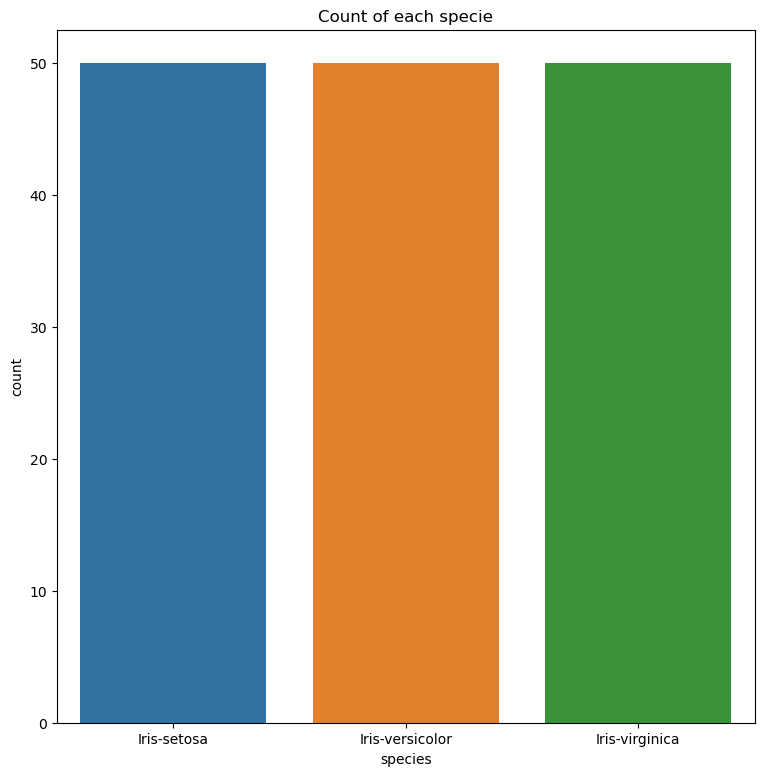

In [336]:
plt.figure(figsize=(9,9))  
sns.countplot(data=df,x="species") 
plt.title("Count of each specie")
plt.show()

### Kdeplot

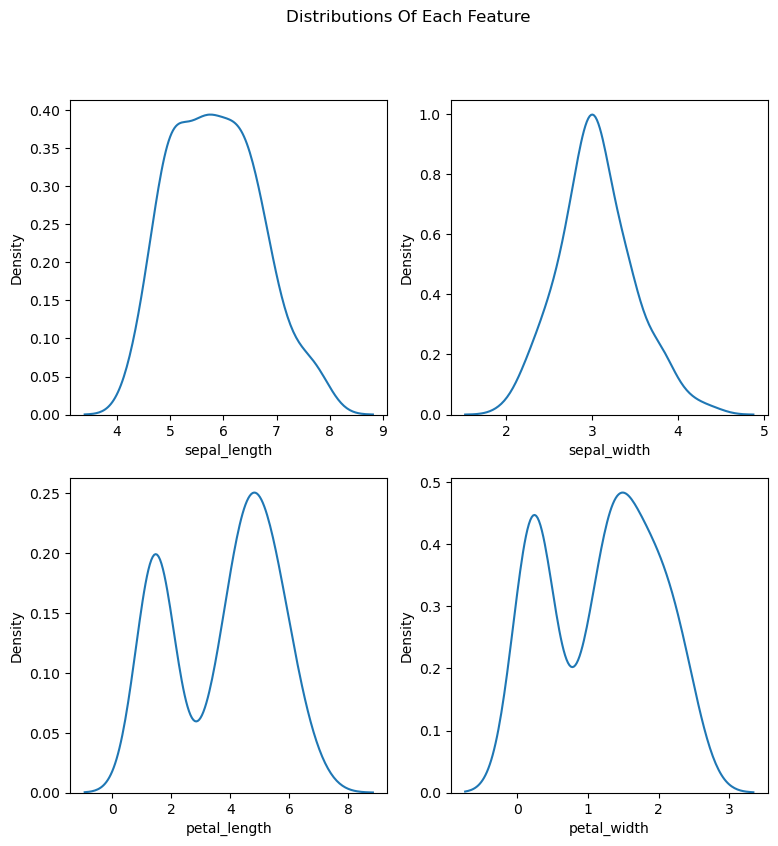

In [337]:
plt.figure(figsize=(9,9)) 
for i in range(len(df.columns[:-1])): 
    plt.subplot(2,2,i+1)
    sns.kdeplot(data=df,x=df.columns[i]) 
    plt.xlabel(df.columns[i]) 
plt.suptitle("Distributions Of Each Feature")
plt.show() 

### Boxplot

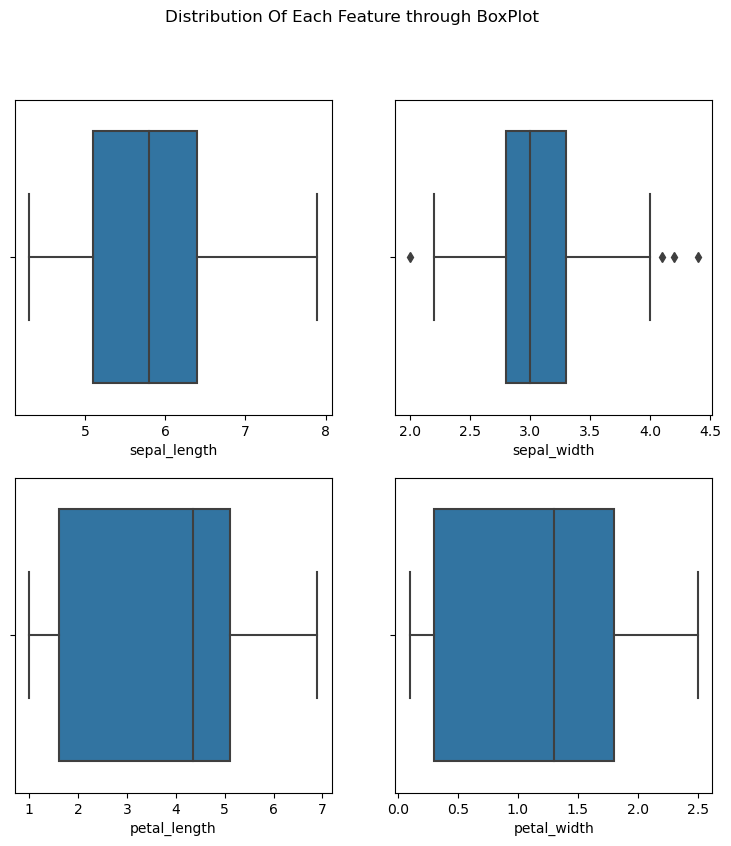

In [338]:
plt.figure(figsize=(9,9)) 
for i in range(len(df.columns[:-1])): 
    plt.subplot(2,2,i+1)
    sns.boxplot(data=df,x=df.columns[i]) 
    plt.xlabel(df.columns[i]) 
plt.suptitle("Distribution Of Each Feature through BoxPlot")
plt.show()
    

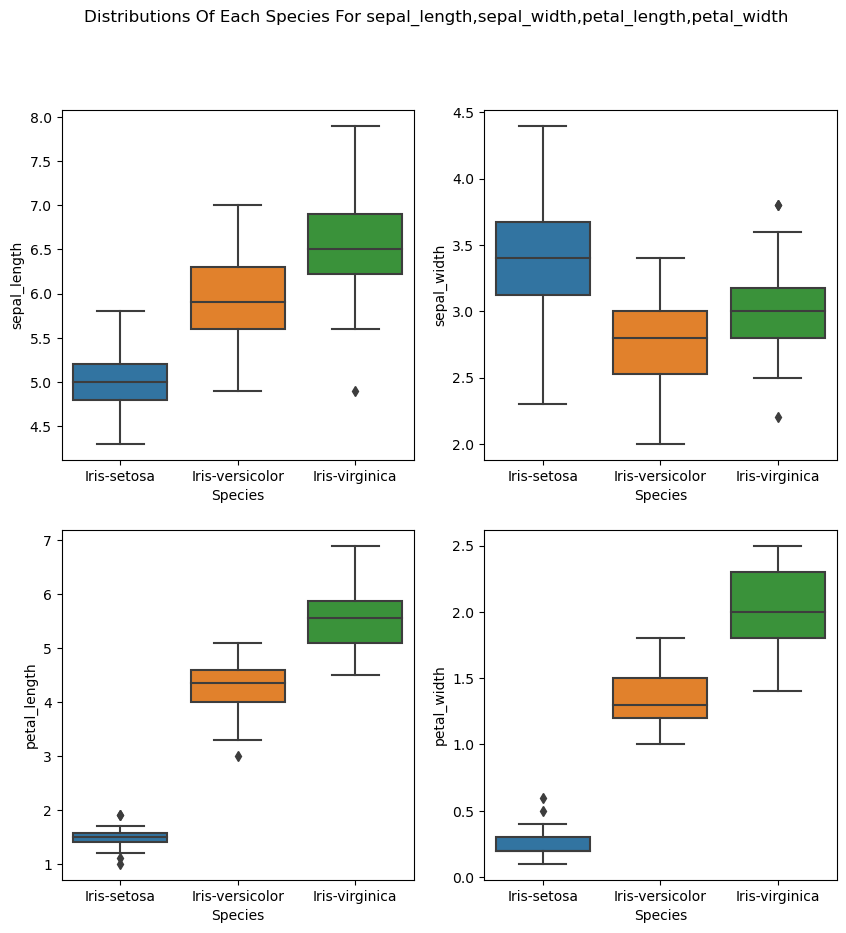

In [339]:
plt.figure(figsize=(10,10)) 
for i in range(len(df.columns[:-1])): 
    plt.subplot(2,2,i+1)
    sns.boxplot(data=df,x="species",y=df.columns[i]) 
    plt.xlabel("Species") 
    plt.ylabel(df.columns[i]) 
plt.suptitle("Distributions Of Each Species For sepal_length,sepal_width,petal_length,petal_width")
plt.show()

### Swarmplot

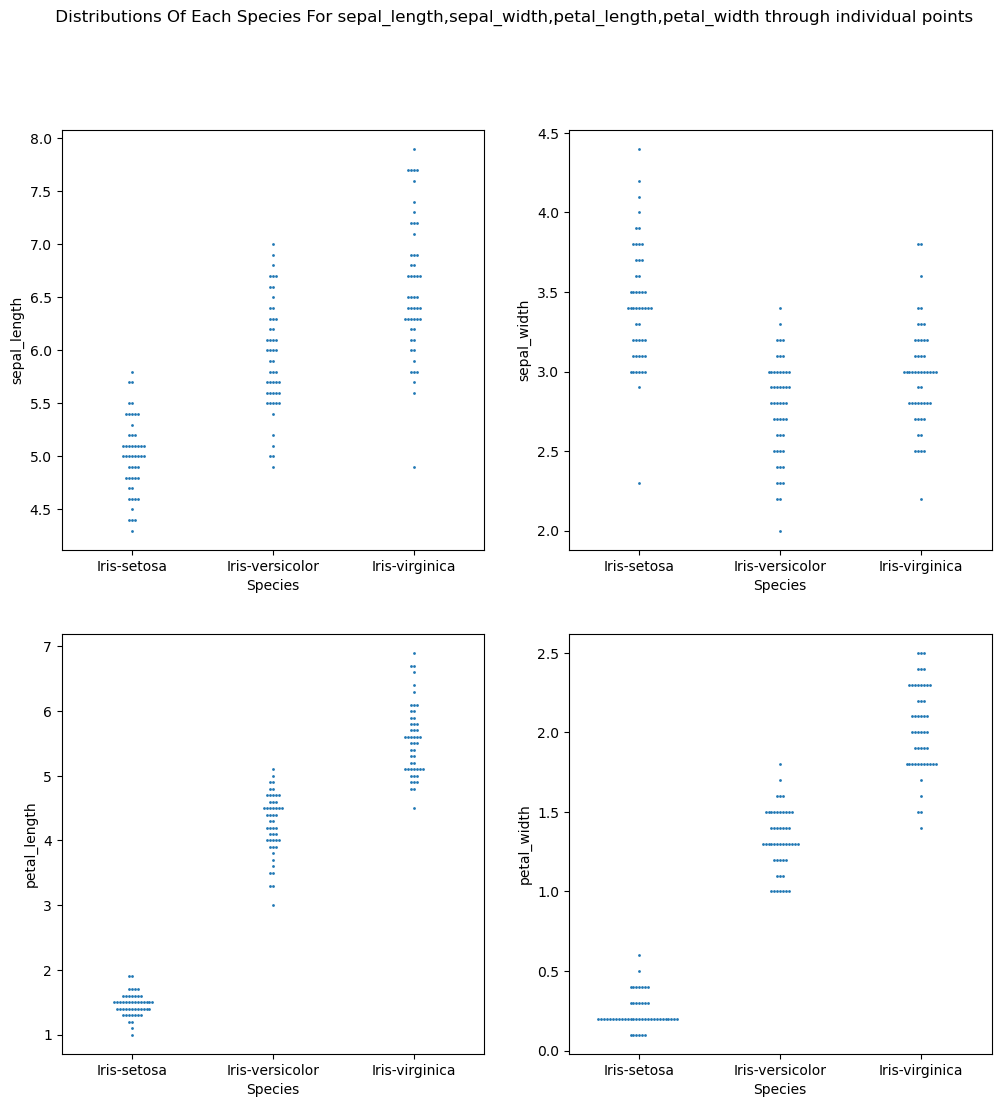

In [340]:
plt.figure(figsize=(12,12)) 
for i in range(len(df.columns[:-1])): 
    plt.subplot(2,2,i+1)
    sns.swarmplot(data=df,x="species",y=df.columns[i],size=2.0) 
    plt.xlabel("Species") 
    plt.ylabel(df.columns[i])  
plt.suptitle(" Distributions Of Each Species For sepal_length,sepal_width,petal_length,petal_width through individual points")
plt.show()

## Feature Transformation

In [341]:
le=LabelEncoder() 
le.fit(df["species"]) 
df["species"]=le.transform(df["species"])

## Splitting Into Independent And Dependent Data

In [342]:
X=df.drop(columns=["species"]) 
Y=df["species"]

## Splitting Into Train And Test Data

In [343]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.25,random_state=42) 

In [344]:
Xtrain

,sepal_length,sepal_width,petal_length,petal_width
4,5.0,3.6,1.4,0.2
32,5.2,4.1,1.5,0.1
142,5.8,2.7,5.1,1.9
85,6.0,3.4,4.5,1.6
86,6.7,3.1,4.7,1.5
...,...,...,...,...
71,6.1,2.8,4.0,1.3
106,4.9,2.5,4.5,1.7
14,5.8,4.0,1.2,0.2
92,5.8,2.6,4.0,1.2


## Normalizing Data

In [345]:
M=MinMaxScaler()
M.fit(Xtrain) 
Xtrain.iloc[:,:]=M.transform(Xtrain.iloc[:,:])
Xtest.iloc[:,:]=M.transform(Xtest.iloc[:,:])

In [346]:
Xtrain

,sepal_length,sepal_width,petal_length,petal_width
4,0.205882,0.727273,0.053571,0.041667
32,0.264706,0.954545,0.071429,0.000000
142,0.441176,0.318182,0.714286,0.750000
85,0.500000,0.636364,0.607143,0.625000
86,0.705882,0.500000,0.642857,0.583333
...,...,...,...,...
71,0.529412,0.363636,0.517857,0.500000
106,0.176471,0.227273,0.607143,0.666667
14,0.441176,0.909091,0.017857,0.041667
92,0.441176,0.272727,0.517857,0.458333


## Model Building

### Logistic Regression

In [347]:
l=LogisticRegression(multi_class='multinomial',solver='lbfgs')  
l.fit(Xtrain,Ytrain) 
ypred=l.predict(Xtest)

<Axes: >

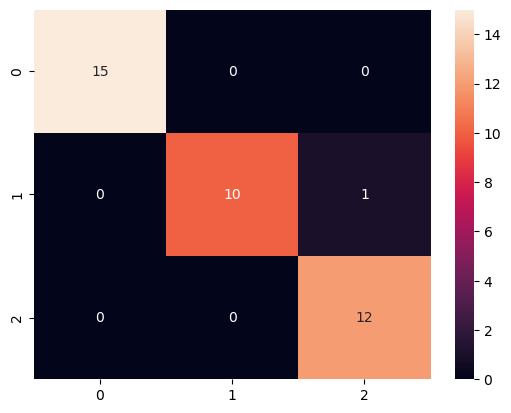

In [348]:
sns.heatmap(confusion_matrix(Ytest,ypred),annot=True)

In [349]:
accuracy_score(Ytest,ypred)

0.9736842105263158

In [350]:
print(classification_report(Ytest,ypred,target_names=species))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      0.91      0.95        11
 Iris-virginica       0.92      1.00      0.96        12

       accuracy                           0.97        38
      macro avg       0.97      0.97      0.97        38
   weighted avg       0.98      0.97      0.97        38



### DecisionTreeClassifier

In [351]:
dt=DecisionTreeClassifier()  
dt.fit(Xtrain,Ytrain) 
ypred=dt.predict(Xtest)

<Axes: >

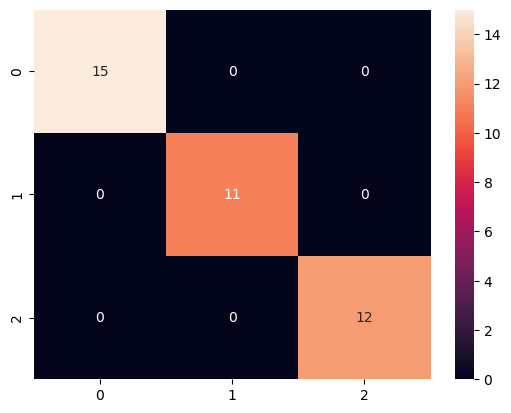

In [352]:
sns.heatmap(confusion_matrix(Ytest,ypred),annot=True)

In [353]:
accuracy_score(Ytest,ypred)

1.0

In [354]:
print(classification_report(Ytest,ypred,target_names=species))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      1.00      1.00        11
 Iris-virginica       1.00      1.00      1.00        12

       accuracy                           1.00        38
      macro avg       1.00      1.00      1.00        38
   weighted avg       1.00      1.00      1.00        38



### RandomForestClassifier

In [355]:
rf=RandomForestClassifier()  
rf.fit(Xtrain,Ytrain) 
ypred=rf.predict(Xtest)

<Axes: >

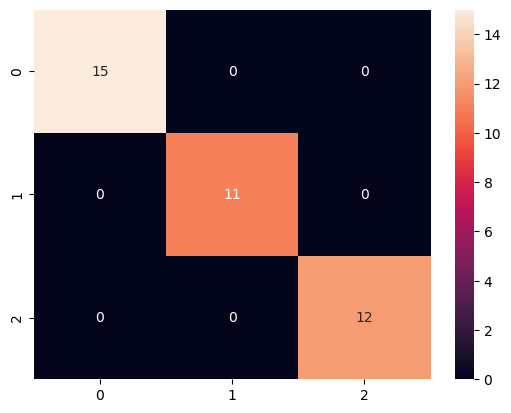

In [356]:
sns.heatmap(confusion_matrix(Ytest,ypred),annot=True)

In [357]:
accuracy_score(Ytest,ypred)

1.0

In [358]:
print(classification_report(Ytest,ypred,target_names=species))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      1.00      1.00        11
 Iris-virginica       1.00      1.00      1.00        12

       accuracy                           1.00        38
      macro avg       1.00      1.00      1.00        38
   weighted avg       1.00      1.00      1.00        38

